# Imports

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os
import sys

sys.path.insert(0, '../_shared')
from data_parser import DataParser

# Data from xml

In [103]:
xml_files = ['F1', 'F2']

In [104]:
csv_path = '../_shared/data/synthetic-v2/data.csv'

# Keep in mind that the generated file could be too large to be pushed to GitHub
if not os.path.exists(csv_path):
    dataParser = DataParser()
    df = None
    for xml_file in xml_files:
        with open(f'../_shared/data/synthetic-v2/dataset{xml_file}.xml', 'r') as f:
            xml_string = f.read()
        if df is None:
            df = dataParser.convert_xml_to_dataframe(xml_string)
        else:
            df = pd.concat([df, dataParser.convert_xml_to_dataframe(xml_string)])
    df.to_csv(csv_path, index=False)

In [105]:
df = pd.read_csv(csv_path)
df.head()

,PATIENT_ID,GENDER_MALE,GENDER_FEMALE,BIRTH_DATE,AGE_RANGE_20,AGE_RANGE_40,AGE_RANGE_60,VISIT_DATE,VISIT_AGE,TREATING_PROVIDER_DENTIST,TREATING_PROVIDER_FACULTY,TREATING_PROVIDER_STUDENT,DDS_CODE_D4210,DDS_CODE_D4211,BLEEDING_ON_PROBING,NR_OF_POCKET,NR_OF_FURCATION,NR_OF_MOBILITY,TOTAL_LOSS_OF_ATTACHMENT_LEVEL,HAS_PARODONTITIS
0,5988054,0,1,27-10-1957,0,0,0,13-12-1958,1,0,1,0,0,0,0,0,0,0,0,0
1,5988054,0,1,27-10-1957,0,0,0,5-12-1958,1,0,1,0,0,0,0,0,0,0,0,0
2,5988054,0,1,27-10-1957,0,0,0,14-6-1959,1,0,1,0,0,0,0,0,0,0,0,0
3,5988054,0,1,27-10-1957,0,0,0,19-12-1959,2,0,1,0,0,0,0,0,0,0,0,0
4,5988054,0,1,27-10-1957,0,0,0,16-6-1960,2,0,1,0,0,0,0,0,0,0,0,0


# Data from csv

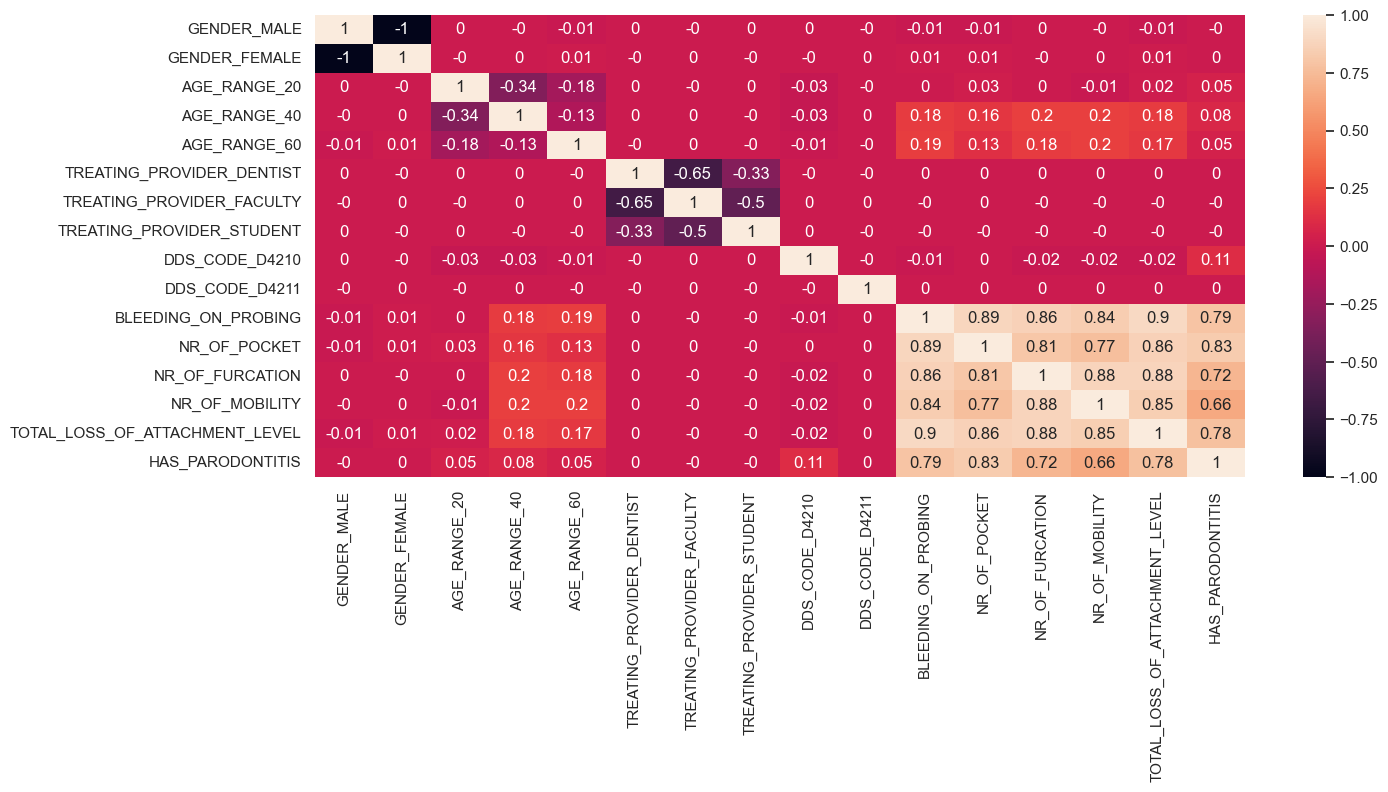

In [106]:
df = df[[
    # 'PATIENT_ID',
    'GENDER_MALE',
    'GENDER_FEMALE',
    # 'BIRTH_DATE',
    'AGE_RANGE_20',
    'AGE_RANGE_40',
    'AGE_RANGE_60',
    # 'VISIT_DATE',
    'TREATING_PROVIDER_DENTIST',
    'TREATING_PROVIDER_FACULTY',
    'TREATING_PROVIDER_STUDENT',
    'DDS_CODE_D4210',
    'DDS_CODE_D4211',
    'BLEEDING_ON_PROBING',
    'NR_OF_POCKET',
    'NR_OF_FURCATION',
    'NR_OF_MOBILITY',
    'TOTAL_LOSS_OF_ATTACHMENT_LEVEL',
    'HAS_PARODONTITIS'
]]

# Visualizing a Pandas Correlation Matrix Using Seaborn
matrix = df.corr().round(2)
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(matrix, annot=True)
plt.show()

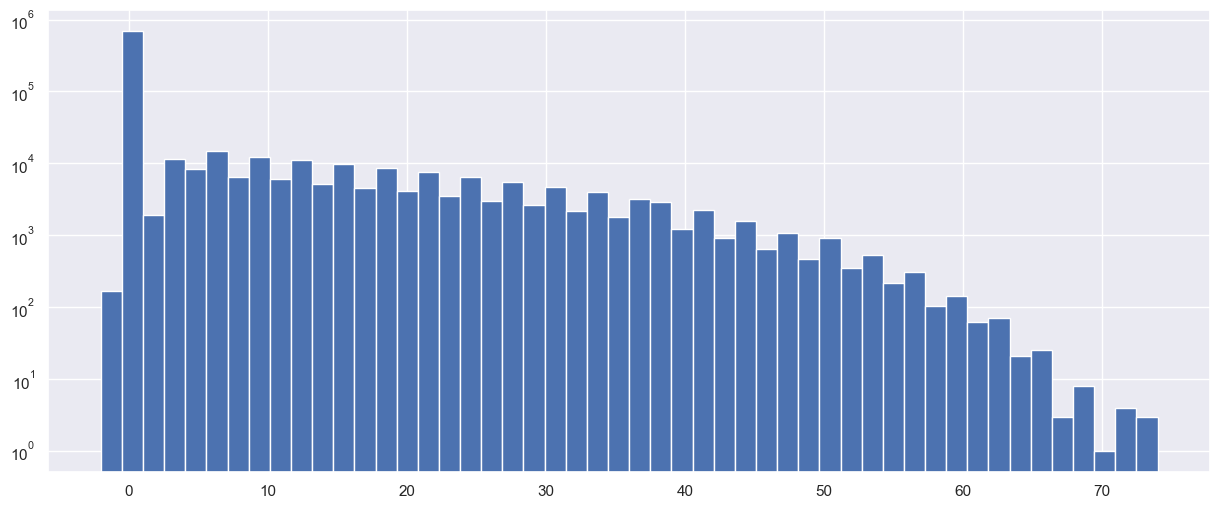

In [107]:
plt.hist([df['BLEEDING_ON_PROBING']], bins=50)
plt.yscale("log")
plt.show()

AGE_RANGE_20: 283850
AGE_RANGE_40: 167272
AGE_RANGE_60: 52762
TEENAGER: 357520


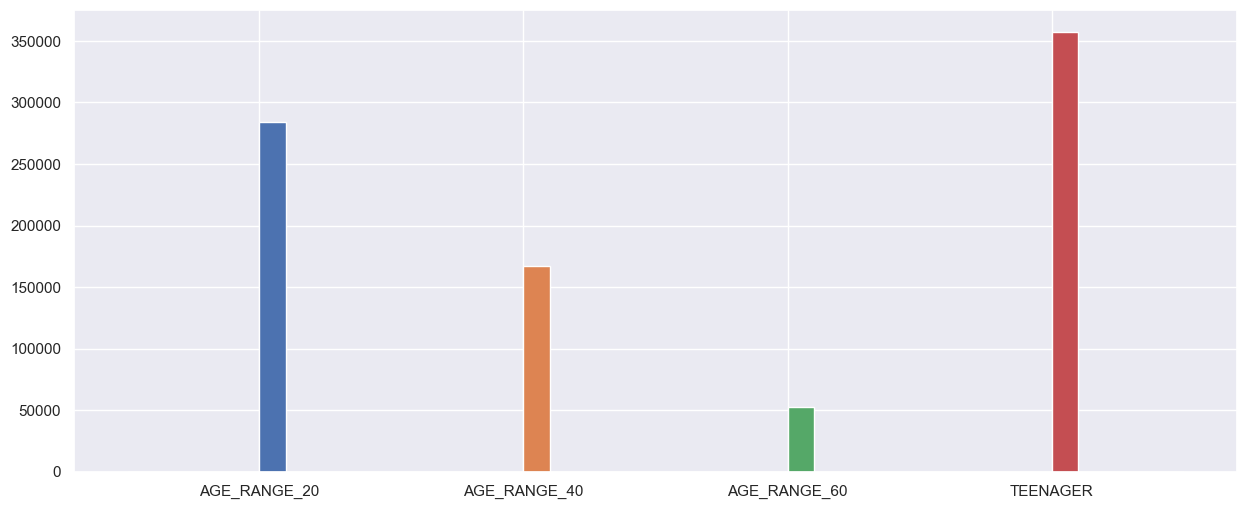

In [108]:
features = ['AGE_RANGE_20', 'AGE_RANGE_40', 'AGE_RANGE_60']

for feature in features:
    mask = df[feature] > 0
    amount = len(df[mask])
    print(f"{feature}: {amount}")
    lst = [feature] * amount
    plt.hist(lst, label=feature)



mask = (df['AGE_RANGE_20'] == 0) & (df['AGE_RANGE_40'] == 0) & (df['AGE_RANGE_60'] == 0)
amount = len(df[mask])
lst = ['TEENAGER'] * amount
plt.hist(lst, label='TEENAGER')
print(f"TEENAGER: {amount}")


# plt.yscale("log")
plt.show()

TREATING_PROVIDER_DENTIST: 258442
TREATING_PROVIDER_FACULTY: 430538
TREATING_PROVIDER_STUDENT: 172424


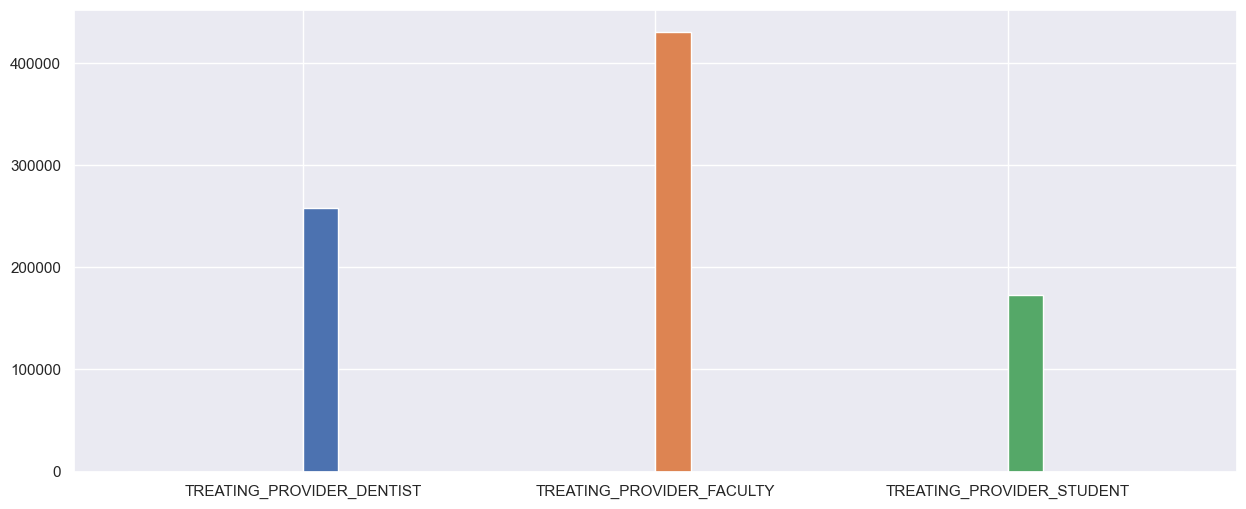

In [109]:
features = ['TREATING_PROVIDER_DENTIST', 'TREATING_PROVIDER_FACULTY', 'TREATING_PROVIDER_STUDENT']

for feature in features:
    mask = df[feature] > 0
    amount = len(df[mask])
    print(f"{feature}: {amount}")
    lst = [feature] * amount
    plt.hist(lst, label=feature)


plt.show()

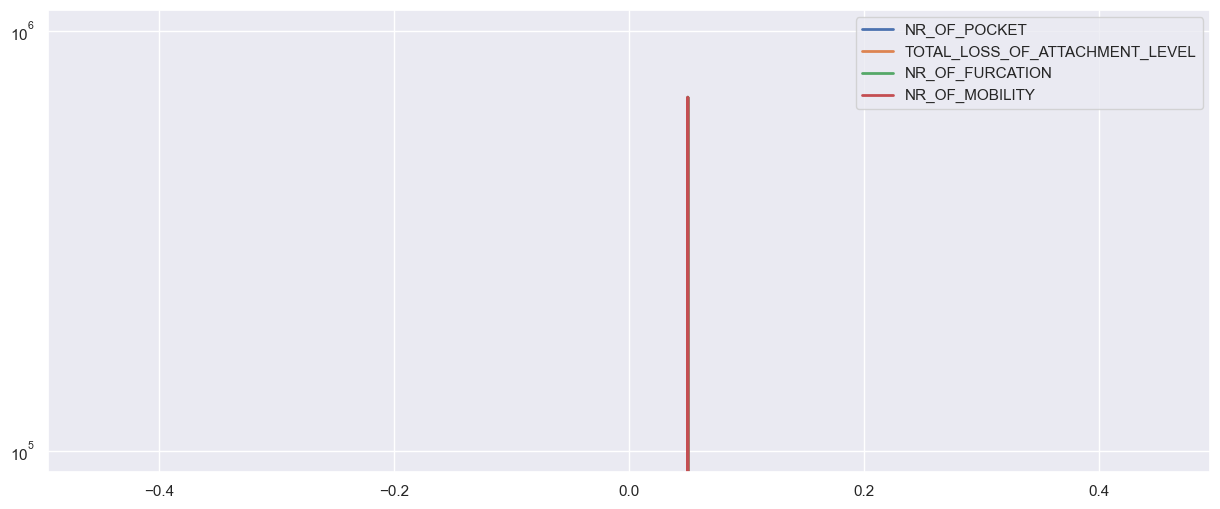

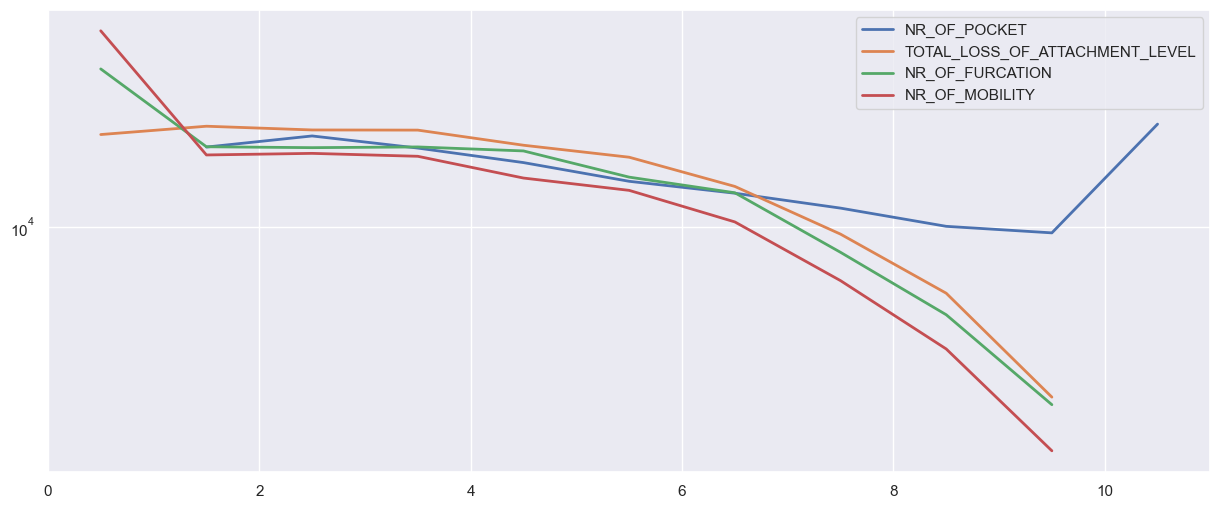

In [110]:
features = ['NR_OF_POCKET', 'TOTAL_LOSS_OF_ATTACHMENT_LEVEL', 'NR_OF_FURCATION', 'NR_OF_MOBILITY']
arr = [0, 1]

for a in arr:
    mask = df['HAS_PARODONTITIS'] == a

    temp = df[mask]
    for feature in features:
        y, x = np.histogram(temp[feature], bins=10)

        # Written by Dion Koeze
        plt.plot([(l+r)/2 for l,r in zip(x[:-1], x[1:])], y, linewidth=2)


    plt.yscale("log")
    plt.legend(features)
    plt.show()